# Agrupación de Datos con K-Means: Samsung Data

## Carga y Preprocesamiento de Datos

In [1]:

# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos
data = pd.read_csv('samsung.csv')

# Convertir las fechas al formato datetime y eliminar la columna 'Date' para la agrupación
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
numeric_data = data[['Close', 'Volume']]

# Estandarizar los datos numéricos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Mostrar un resumen de los datos
data.head()


,Date,Close,Volume
0,2008-01-02,10880,18047200
1,2008-01-03,10920,19346500
2,2008-01-04,10780,17997350
3,2008-01-07,10380,39787200
4,2008-01-08,10320,24783700


## Determinación del Número de Clusters

c:\skul\base\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\skul\base\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\skul\base\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\skul\base\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress

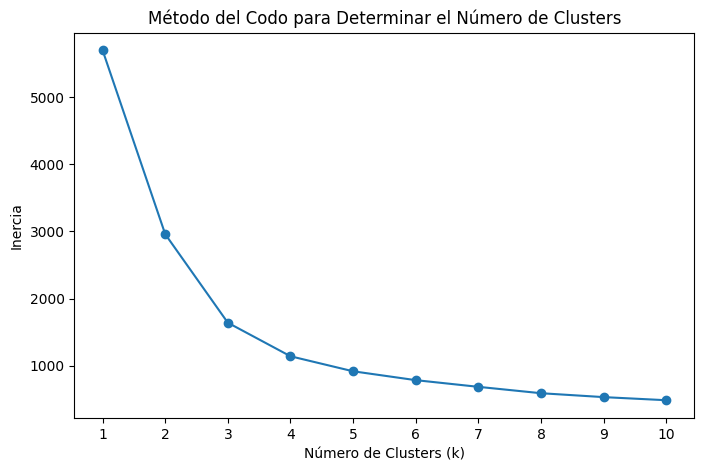

In [2]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determinar el número óptimo de clusters utilizando el método del codo
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Gráfica del método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para Determinar el Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.show()


## Entrenamiento del Modelo

In [3]:

# Definir el número óptimo de clusters
optimal_k = 3

# Entrenar el modelo K-Means
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans_model.fit_predict(scaled_data)

# Resumen del tamaño de cada cluster
data['Cluster'].value_counts()


c:\skul\base\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
0    1597
2     631
1     622
Name: count, dtype: int64

## Visualización e Interpretación de Resultados

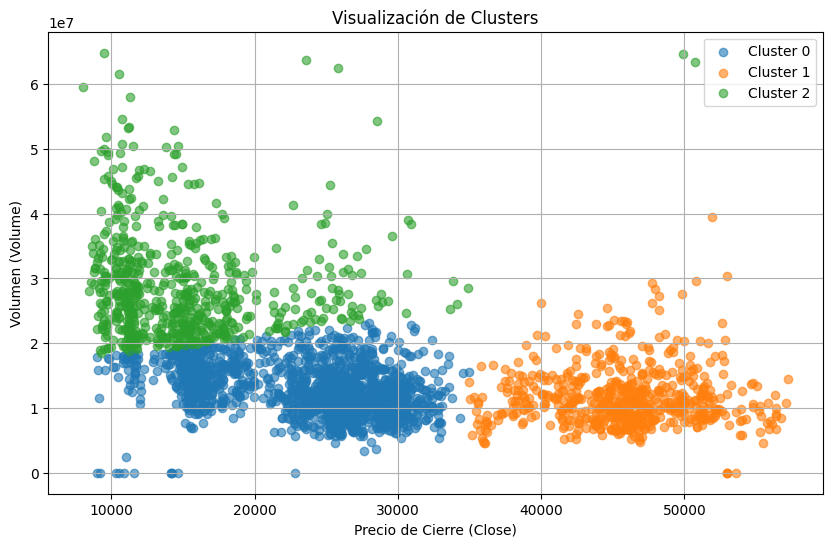

In [5]:

# Visualizar los clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Close'], cluster_data['Volume'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Visualización de Clusters')
plt.xlabel('Precio de Cierre (Close)')
plt.ylabel('Volumen (Volume)')
plt.legend()
plt.grid(True)
plt.show()
